In [1]:
pip install pandas openpyxl

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

# Leer la Tabla 1 desde la hoja "No_experimentos"
archivo_excel = "resultados.xlsx"  # Nombre del archivo Excel
tabla1 = pd.read_excel(archivo_excel, sheet_name="No_experimentos")

# Mostrar las primeras filas de la tabla
print(tabla1.head())

   ID del experimento  Repeticion      Promtp          LLMs Patrón de Diseño  \
0                   1            1  Zero Shot    Claude 3.5   Factory Method   
1                   1            2  Zero Shot    Claude 3.5   Factory Method   
2                   1            3  Zero Shot    Claude 3.5   Factory Method   
3                   1            1  Zero Shot   DeepSeek R1   Factory Method   
4                   1            2  Zero Shot   DeepSeek R1   Factory Method   

   Tiempo de respuesta  Número de errores  Porcentaje de éxito  
0                  NaN                1.0               0.6667  
1                  NaN                1.0               0.6667  
2                  NaN                0.0               1.0000  
3                108.0                1.0               0.6667  
4                 43.0                0.0               1.0000  


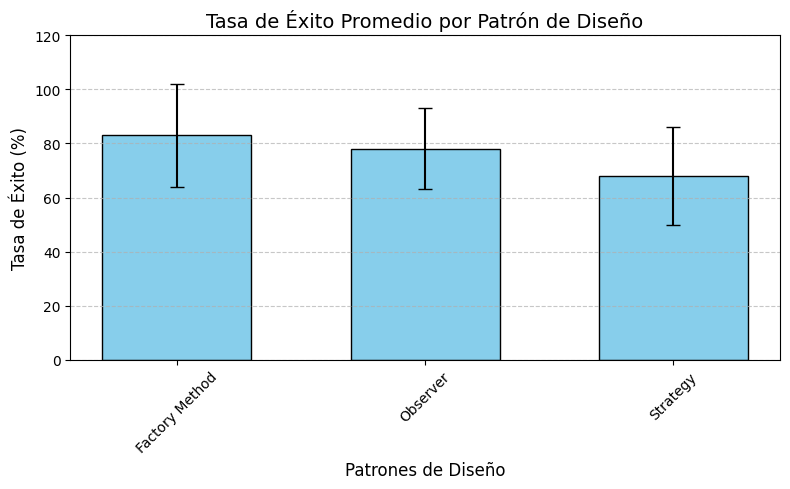

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Datos de ejemplo
data = {
    "Patrón": ["Factory Method", "Observer", "Strategy"],
    "Tasa de éxito (%)": [83, 78, 68],
    "Desviación estándar (%)": [19, 15, 18],  
    "Tiempo de Respuesta (segundos)": [36.42, 30, 40]
}

# Crear DataFrame
df = pd.DataFrame(data)

# Reemplazar None con 0 para graficar
df["Desviación estándar (%)"] = df["Desviación estándar (%)"].fillna(0)

# Gráfico de barras con barras de error
plt.figure(figsize=(8, 5))
x = np.arange(len(df))  # Posiciones en el eje X
bar_width = 0.6

plt.bar(x, df["Tasa de éxito (%)"], yerr=df["Desviación estándar (%)"], capsize=5,
        color="skyblue", edgecolor="black", width=bar_width)

# Personalizar el gráfico
plt.title("Tasa de Éxito Promedio por Patrón de Diseño", fontsize=14)
plt.xlabel("Patrones de Diseño", fontsize=12)
plt.ylabel("Tasa de Éxito (%)", fontsize=12)
plt.xticks(x, df["Patrón"], rotation=45)
plt.ylim(0, 120)  # Límite superior del eje Y
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [2]:
import pandas as pd
import numpy as np

# 1. Función para procesar una tabla individual
def procesar_tabla(df):
    """
    Procesa una tabla individual para calcular estadísticas:
    - Tasa de éxito promedio
    - Desviación estándar del éxito
    - Tiempo de respuesta promedio
    """
    # Calcular estadísticas
    tasa_exito = df["Porcentaje de éxito"].mean()
    desviacion_estandar = df["Porcentaje de éxito"].std()
    tiempo_respuesta = df["Tiempo de respuesta"].mean()

    return {
        "Tasa de éxito": tasa_exito,
        "Desviación estándar (éxito)": desviacion_estandar,
        "Tiempo de Respuesta en segundos": tiempo_respuesta
    }

# 2. Cargar las tres hojas desde un archivo Excel
file_path = "resultados.xlsx"  # Cambia esto por la ruta de tu archivo Excel

# Leer cada hoja del archivo Excel
factory_df = pd.read_excel(file_path, sheet_name="No_experimentos")
observer_df = pd.read_excel(file_path, sheet_name="No_experimentos-o")
strategy_df = pd.read_excel(file_path, sheet_name="No_experimentos-s")

# Convertir columnas numéricas a float
for df in [factory_df, observer_df, strategy_df]:
    df["Porcentaje de éxito"] = df["Porcentaje de éxito"].astype(float)
    df["Tiempo de respuesta"] = df["Tiempo de respuesta"].fillna(0).astype(float)  # Rellenar NaN con 0

# 3. Procesar cada tabla
factory_stats = procesar_tabla(factory_df)
observer_stats = procesar_tabla(observer_df)
strategy_stats = procesar_tabla(strategy_df)

# Crear una lista de diccionarios para los patrones
patrones = [
    {"Patrón": "Factory Method", **factory_stats},
    {"Patrón": "Observer", **observer_stats},
    {"Patrón": "Strategy", **strategy_stats}
]

# Convertir la lista de diccionarios en un DataFrame
tabla_final = pd.DataFrame(patrones)

# Reemplazar NaN con valores vacíos o 0 según corresponda
tabla_final = tabla_final.fillna({
    "Tasa de éxito": "",  # Vacío si no hay datos
    "Desviación estándar (éxito)": "",  # Vacío si no hay datos
    "Tiempo de Respuesta en segundos": 0  # 0 si no hay datos
})

# Formatear las columnas para mostrar valores como porcentajes y decimales
tabla_final["Tasa de éxito"] = tabla_final["Tasa de éxito"].apply(lambda x: f"{x:.0f}%" if x != "" else "")
tabla_final["Desviación estándar (éxito)"] = tabla_final["Desviación estándar (éxito)"].apply(lambda x: f"{x:.0f}%" if x != "" else "")
tabla_final["Tiempo de Respuesta en segundos"] = tabla_final["Tiempo de Respuesta en segundos"].apply(lambda x: f"{x:.2f}".replace(".", ",") if x > 0 else "")

# Mostrar la tabla final
print("Tabla Final:")
print(tabla_final)

# Exportar la tabla final a un archivo Excel
output_file = "tabla_final_organizada.xlsx"
tabla_final.to_excel(output_file, index=False)

Tabla Final:
           Patrón Tasa de éxito Desviación estándar (éxito)  \
0  Factory Method            1%                          0%   
1        Observer            1%                          0%   
2        Strategy            1%                          0%   

  Tiempo de Respuesta en segundos  
0                            3,09  
1                            3,09  
2                            3,09  


Tabla Final:
           Patrón Tasa de éxito Desviación estándar IC Inferior IC Superior  \
0  Factory Method             1                   0           1           1   
1        Observer             1                   0           1           1   
2        Strategy             1                   0           1           1   

   Error bar Tiempo de Respuesta  
0    0.03443                3,09  
1    0.03443                3,09  
2    0.03443                3,09  


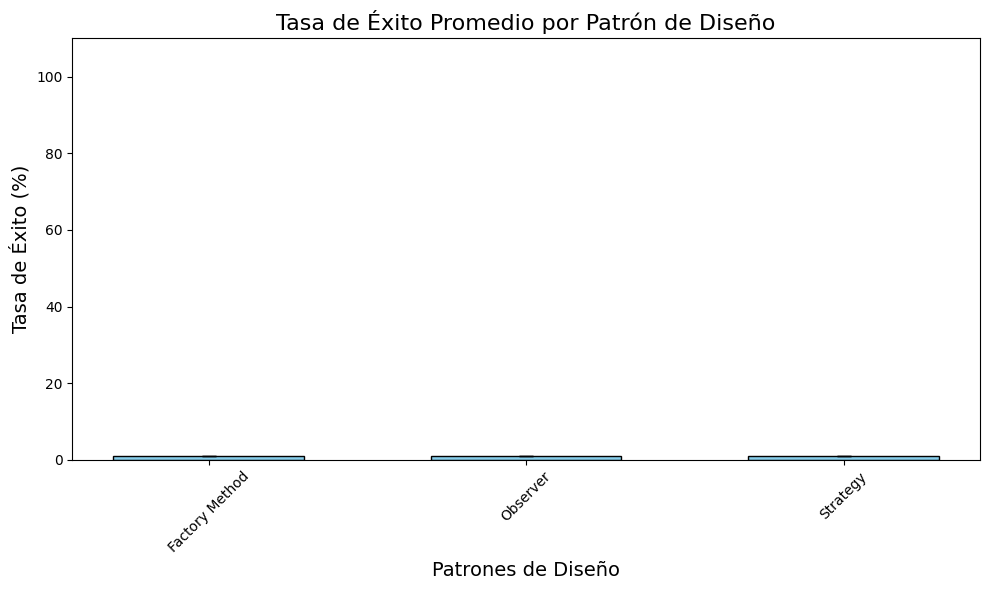

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Función para procesar una tabla individual
def procesar_tabla(df):
    """
    Procesa una tabla individual para calcular estadísticas:
    - Tasa de éxito promedio
    - Desviación estándar del éxito
    - Intervalo de confianza del 95%
    - Tiempo de respuesta promedio
    """
    # Calcular estadísticas
    tasa_exito = df["Porcentaje de éxito"].mean()
    desviacion_estandar = df["Porcentaje de éxito"].std()
    tiempo_respuesta = df["Tiempo de respuesta"].mean()

    # Calcular intervalo de confianza del 95%
    n = len(df)  # Número de observaciones
    z = 1.96  # Valor crítico para IC 95%
    error_estandar = desviacion_estandar / np.sqrt(n)
    ic_inferior = tasa_exito - z * error_estandar
    ic_superior = tasa_exito + z * error_estandar

    return {
        "Tasa de éxito": tasa_exito,
        "Desviación estándar": desviacion_estandar,
        "IC Inferior": ic_inferior,
        "IC Superior": ic_superior,
        "Error bar": z * error_estandar,  # Longitud de la barra de error
        "Tiempo de Respuesta": tiempo_respuesta
    }

# 2. Cargar las tres hojas desde un archivo Excel
file_path = "resultados.xlsx"  # Cambia esto por la ruta de tu archivo Excel

# Leer cada hoja del archivo Excel
factory_df = pd.read_excel(file_path, sheet_name="No_experimentos")
observer_df = pd.read_excel(file_path, sheet_name="No_experimentos-o")
strategy_df = pd.read_excel(file_path, sheet_name="No_experimentos-s")

# Convertir columnas numéricas a float
for df in [factory_df, observer_df, strategy_df]:
    df["Porcentaje de éxito"] = df["Porcentaje de éxito"].astype(float)
    df["Tiempo de respuesta"] = df["Tiempo de respuesta"].fillna(0).astype(float)  # Rellenar NaN con 0

# 3. Procesar cada tabla
factory_stats = procesar_tabla(factory_df)
observer_stats = procesar_tabla(observer_df)
strategy_stats = procesar_tabla(strategy_df)

# Crear una lista de diccionarios para los patrones
patrones = [
    {"Patrón": "Factory Method", **factory_stats},
    {"Patrón": "Observer", **observer_stats},
    {"Patrón": "Strategy", **strategy_stats}
]

# Convertir la lista de diccionarios en un DataFrame
tabla_final = pd.DataFrame(patrones)

# Reemplazar NaN con valores vacíos o 0 según corresponda
tabla_final = tabla_final.fillna({
    "Tasa de éxito": "",  # Vacío si no hay datos
    "Desviación estándar": "",  # Vacío si no hay datos
    "IC Inferior": "",  # Vacío si no hay datos
    "IC Superior": "",  # Vacío si no hay datos
    "Error bar": 0,  # 0 si no hay datos
    "Tiempo de Respuesta": 0  # 0 si no hay datos
})

# Formatear las columnas para mostrar valores como porcentajes y decimales
tabla_final["Tasa de éxito"] = tabla_final["Tasa de éxito"].apply(lambda x: f"{x:.0f}" if x != "" else "")
tabla_final["Desviación estándar"] = tabla_final["Desviación estándar"].apply(lambda x: f"{x:.0f}" if x != "" else "")
tabla_final["IC Inferior"] = tabla_final["IC Inferior"].apply(lambda x: f"{x:.0f}" if x != "" else "")
tabla_final["IC Superior"] = tabla_final["IC Superior"].apply(lambda x: f"{x:.0f}" if x != "" else "")
tabla_final["Tiempo de Respuesta"] = tabla_final["Tiempo de Respuesta"].apply(lambda x: f"{x:.2f}".replace(".", ",") if x > 0 else "")

# Mostrar la tabla final
print("Tabla Final:")
print(tabla_final)

# Exportar la tabla final a un archivo Excel
output_file = "tabla_final_con_IC.xlsx"
tabla_final.to_excel(output_file, index=False)

# 4. Graficar los resultados con barras de error
plt.figure(figsize=(10, 6))

# Datos para el gráfico
patrones_nombres = tabla_final["Patrón"]
tasa_exito = tabla_final["Tasa de éxito"].replace("", 0).astype(float)  # Convertir "" a 0 para graficar
error_bars = tabla_final["Error bar"]

# Gráfico de barras con barras de error
x = np.arange(len(patrones_nombres))  # Posiciones en el eje X
bar_width = 0.6

plt.bar(x, tasa_exito, yerr=error_bars, capsize=5, color="skyblue", edgecolor="black", width=bar_width, label="Promedio de éxito")

# Personalizar el gráfico
plt.title("Tasa de Éxito Promedio por Patrón de Diseño", fontsize=16)
plt.xlabel("Patrones de Diseño", fontsize=14)
plt.ylabel("Tasa de Éxito (%)", fontsize=14)
plt.xticks(x, patrones_nombres, rotation=45)
plt.ylim(0, 110)  # Ajustar límite superior del eje Y
# plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

# Mostrar el gráfico
plt.show()